In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

clean_path = r"C:\weather_monitoring_project\Data\clean_data.csv"

df = pd.read_csv(clean_path)
df.head()

,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone,hour,day,month,weekday
0,1,Ahmedabad,2025-11-16 00:16:38.567400+05:30,20.2,46.0,3.500000,35.85,34.75,26.85,72.0,0,16,11,Sunday
1,2,Bengaluru,2025-11-16 00:16:38.376559+05:30,20.2,88.0,2.888889,44.85,43.15,36.95,53.0,0,16,11,Sunday
2,3,Bhopal,2025-11-16 00:16:38.737303+05:30,18.0,28.0,2.000000,56.95,50.35,20.45,76.0,0,16,11,Sunday
3,4,Chennai,2025-11-16 00:16:38.355079+05:30,27.0,84.0,5.611111,59.25,50.05,8.05,113.0,0,16,11,Sunday
4,5,Dehradun,2025-11-16 00:16:38.785387+05:30,11.4,55.0,2.194444,53.05,51.85,34.55,105.0,0,16,11,Sunday


## Wind and pm 


In [19]:
city = df[df['city'] == 'Dehradun']

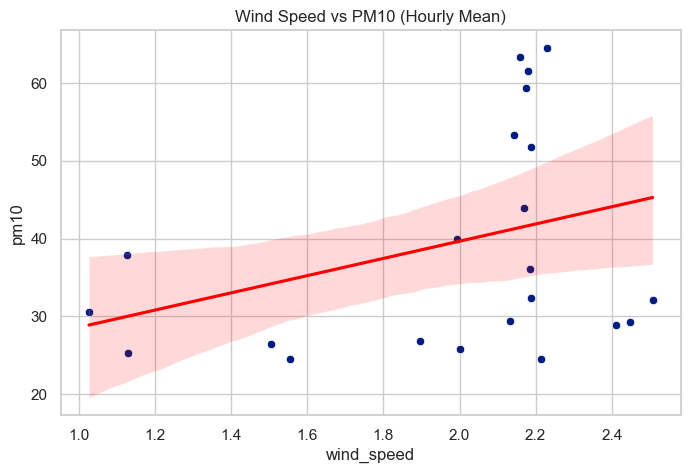

In [20]:
city_hourly = city.groupby('hour')[['wind_speed','pm10']].mean().reset_index()

plt.figure(figsize=(8,5))
sns.scatterplot(data=city_hourly, x='wind_speed', y='pm10')
sns.regplot(data=city_hourly, x='wind_speed', y='pm10', scatter=False, color='red')

plt.title("Wind Speed vs PM10 (Hourly Mean)")
plt.show()


## EXPLANATION

While the overall dataset shows a negative correlation between wind speed and PM10, the city-level analysis for Dehradun shows a mild positive trend.
This suggests that local wind flow in the valley may carry particulate matter instead of dispersing it.
Dehradun’s geography (mountain valley) often traps pollutants or channels dust, causing higher PM levels at higher wind speeds.

# Temperature vs Humidity

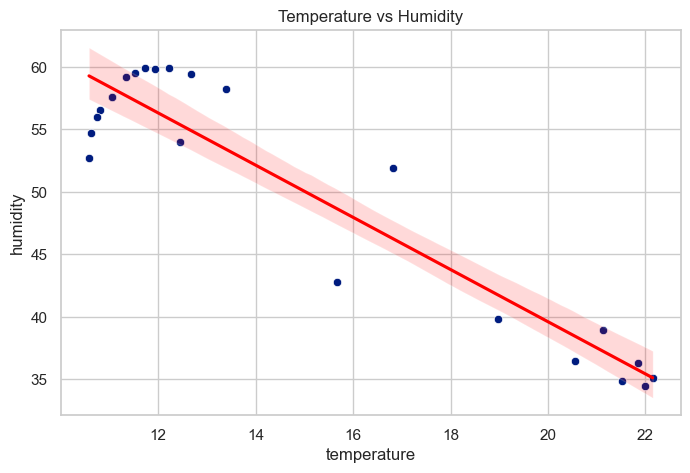

In [21]:
df_hourly = city.groupby('hour')[['temperature','humidity']].mean().reset_index()


plt.figure(figsize=(8,5))
sns.scatterplot(data=df_hourly, x='temperature', y='humidity')
sns.regplot(data=df_hourly, x='temperature', y='humidity',scatter=False, color='red')

plt.title("Temperature vs Humidity")
plt.show()


## EXPLANATION

Humidity decreases as temperature increases.
Cooler morning hours have high humidity, while warmer afternoon hours show a strong drop in humidity.
The negative regression slope indicates that temperature and humidity are inversely related.

# TEMPERATURE VS OZONE

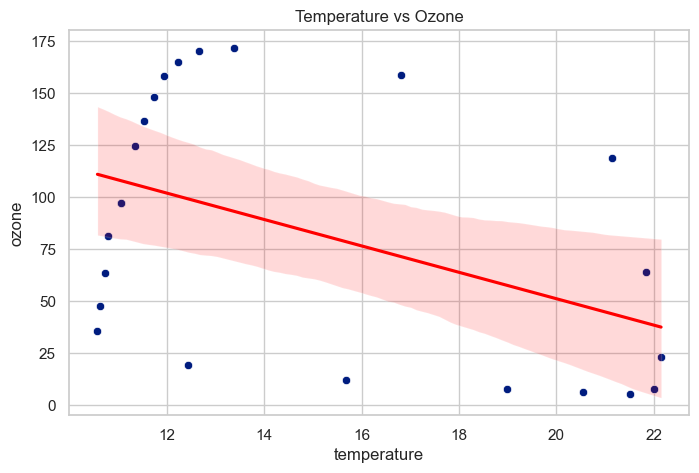

In [22]:
df_hourly2 = city.groupby('hour')[['temperature','ozone']].mean().reset_index()


plt.figure(figsize=(8,5))
sns.scatterplot(data=df_hourly2, x='temperature', y='ozone')
sns.regplot(data=df_hourly2, x='temperature', y='ozone',scatter=False, color='red')

plt.title("Temperature vs Ozone")
plt.show()


# EXPLANATION 

While ozone and temperature show a positive correlation at the all-city level, Dehradun shows the opposite pattern.
Ozone is highest during cooler morning hours and decreases as temperature rises.
This happens because Dehradun’s valley geography and local traffic emissions cause NO₂ titration, where higher NO levels at warmer hours destroy ozone.
As a result, ozone decreases through the day despite rising temperature.
This produces a negative temperature–ozone relationship unique to Dehradun.